In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade scikit-image
!pip install keras
!pip install tensorflow
!pip install --upgrade keras tensorflow
!pip install keras.utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 37.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensor

In [3]:
!mkdir "/content/salam"
#!cp "/content/drive/MyDrive/cell_morphology_binary_images/class0_raw.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class1_raw.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class2_raw.tif" "/content/salam"
#!cp "/content/drive/MyDrive/cell_morphology_binary_images/class0_mask.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class1_mask.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology_binary_images/class2_mask.tif" "/content/salam"
#!cp "/content/drive/MyDrive/cell_morphology_binary_images/class3_raw.tif" "/content/salam"
#!cp "/content/drive/MyDrive/cell_morphology_binary_images/class3_mask.tif" "/content/salam"


In [4]:
!mkdir '/content/salam/images'
!mkdir '/content/salam/mask'
#!mv '/content/salam/class0_raw.tif' '/content/salam/images'
!mv '/content/salam/class1_raw.tif' '/content/salam/images'
!mv '/content/salam/class2_raw.tif' '/content/salam/images'
#!mv '/content/salam/class3_raw.tif' '/content/salam/images'
#!mv '/content/salam/class0_mask.tif' '/content/salam/mask'
!mv '/content/salam/class1_mask.tif' '/content/salam/mask'
!mv '/content/salam/class2_mask.tif' '/content/salam/mask'
#!mv '/content/salam/class3_mask.tif' '/content/salam/mask'


In [5]:
#!mkdir '/content/salam/images/class0'
!mkdir '/content/salam/images/class1'
!mkdir '/content/salam/images/class2'
#!mkdir '/content/salam/images/class3'
#!mkdir '/content/salam/mask/class0'
!mkdir '/content/salam/mask/class1'
!mkdir '/content/salam/mask/class2'
#!mkdir '/content/salam/mask/class3'
#!mv '/content/salam/images/class0_raw.tif' '/content/salam/images/class0'
!mv '/content/salam/images/class1_raw.tif' '/content/salam/images/class1'
!mv '/content/salam/images/class2_raw.tif' '/content/salam/images/class2'
#!mv '/content/salam/images/class3_raw.tif' '/content/salam/images/class3'
#!mv '/content/salam/mask/class0_mask.tif' '/content/salam/mask/class0'
!mv '/content/salam/mask/class1_mask.tif' '/content/salam/mask/class1'
!mv '/content/salam/mask/class2_mask.tif' '/content/salam/mask/class2'
#!mv '/content/salam/mask/class3_mask.tif' '/content/salam/mask/class3'



In [6]:
import tifffile
import glob
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.optimizers import SGD, RMSprop
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import os
import numpy as np
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import cv2
import time
import pandas as pd
from tqdm import tqdm
import gc; gc.collect()
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.utils.data as D
import torch.nn.functional as F
from PIL import Image
import torchvision
from torchvision import transforms as T
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from PIL import Image
from keras.utils import to_categorical
# Data preprocessing
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from glob import glob
import random
import keras
from keras.models import Sequential, Model,load_model
from keras.layers import Activation,Dense, Dropout, Flatten, Convolution2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.layers.normalization import batch_normalization
#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import img_to_array
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.metrics import PrecisionAtRecall,Recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import multiprocessing as mp
from numpy.random import seed
seed(0)
import tensorflow
tensorflow.random.set_seed(0)


Number of data points in class1: 5


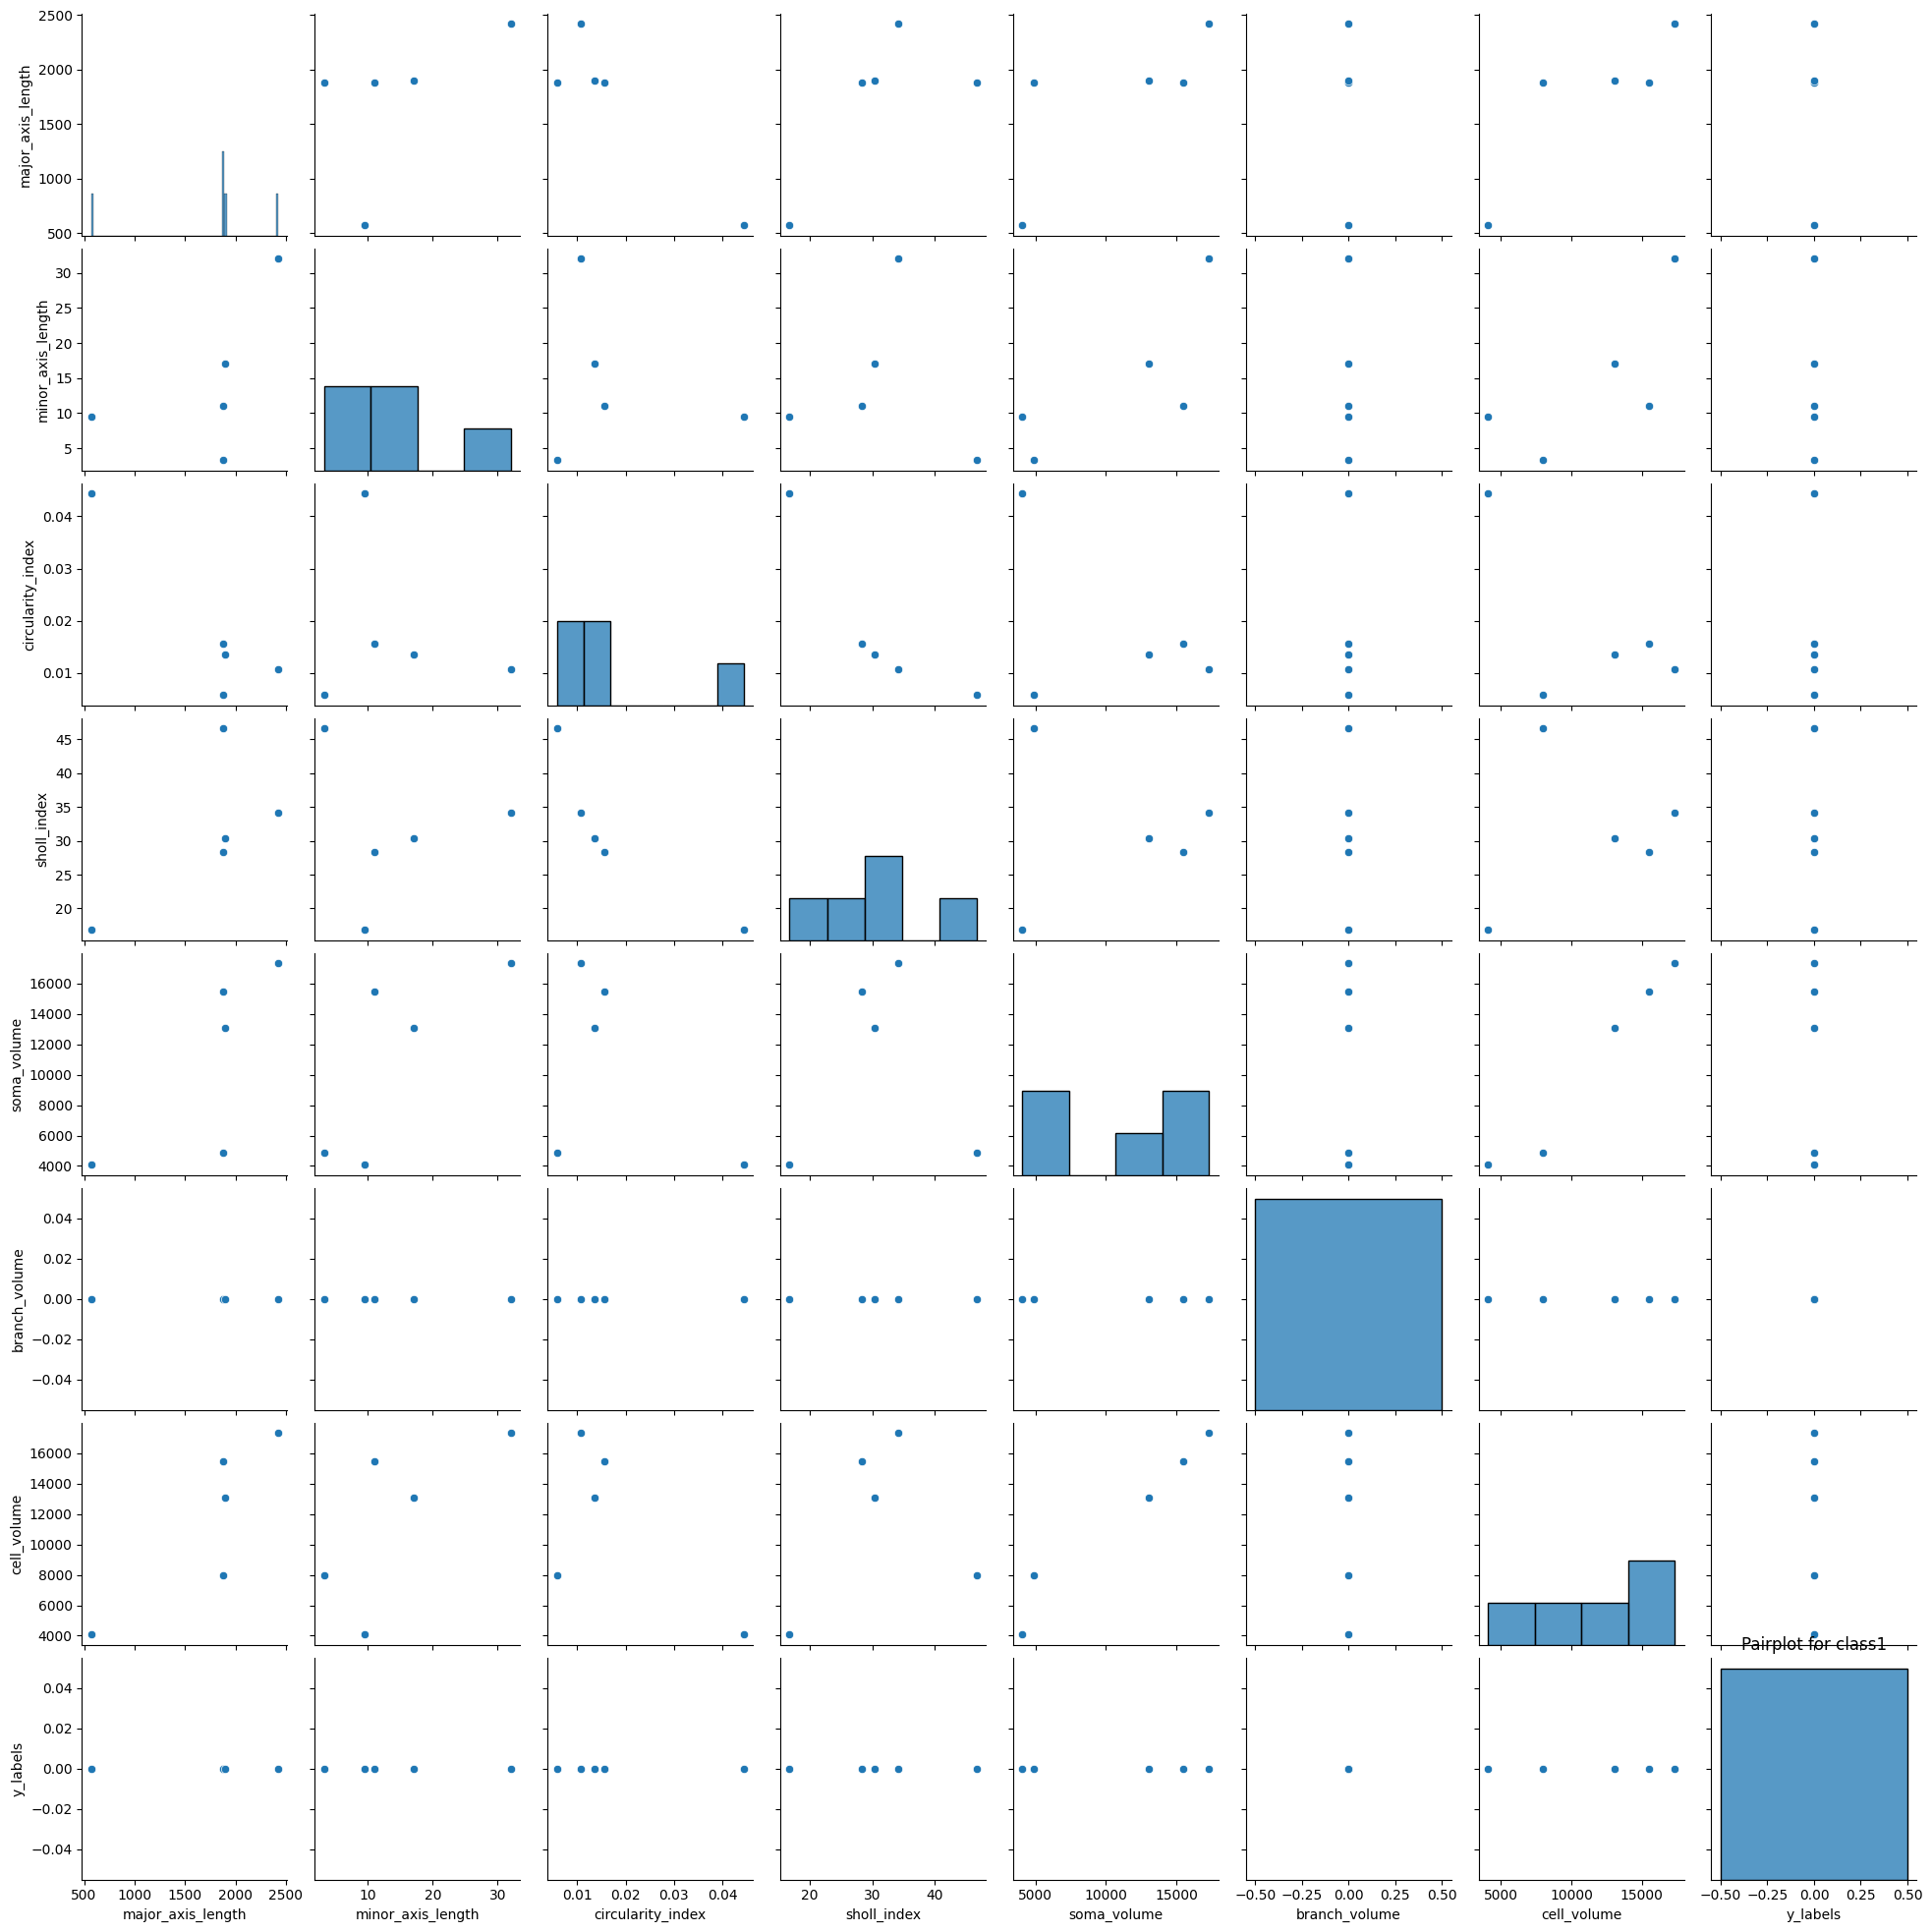

Number of data points in class2: 80


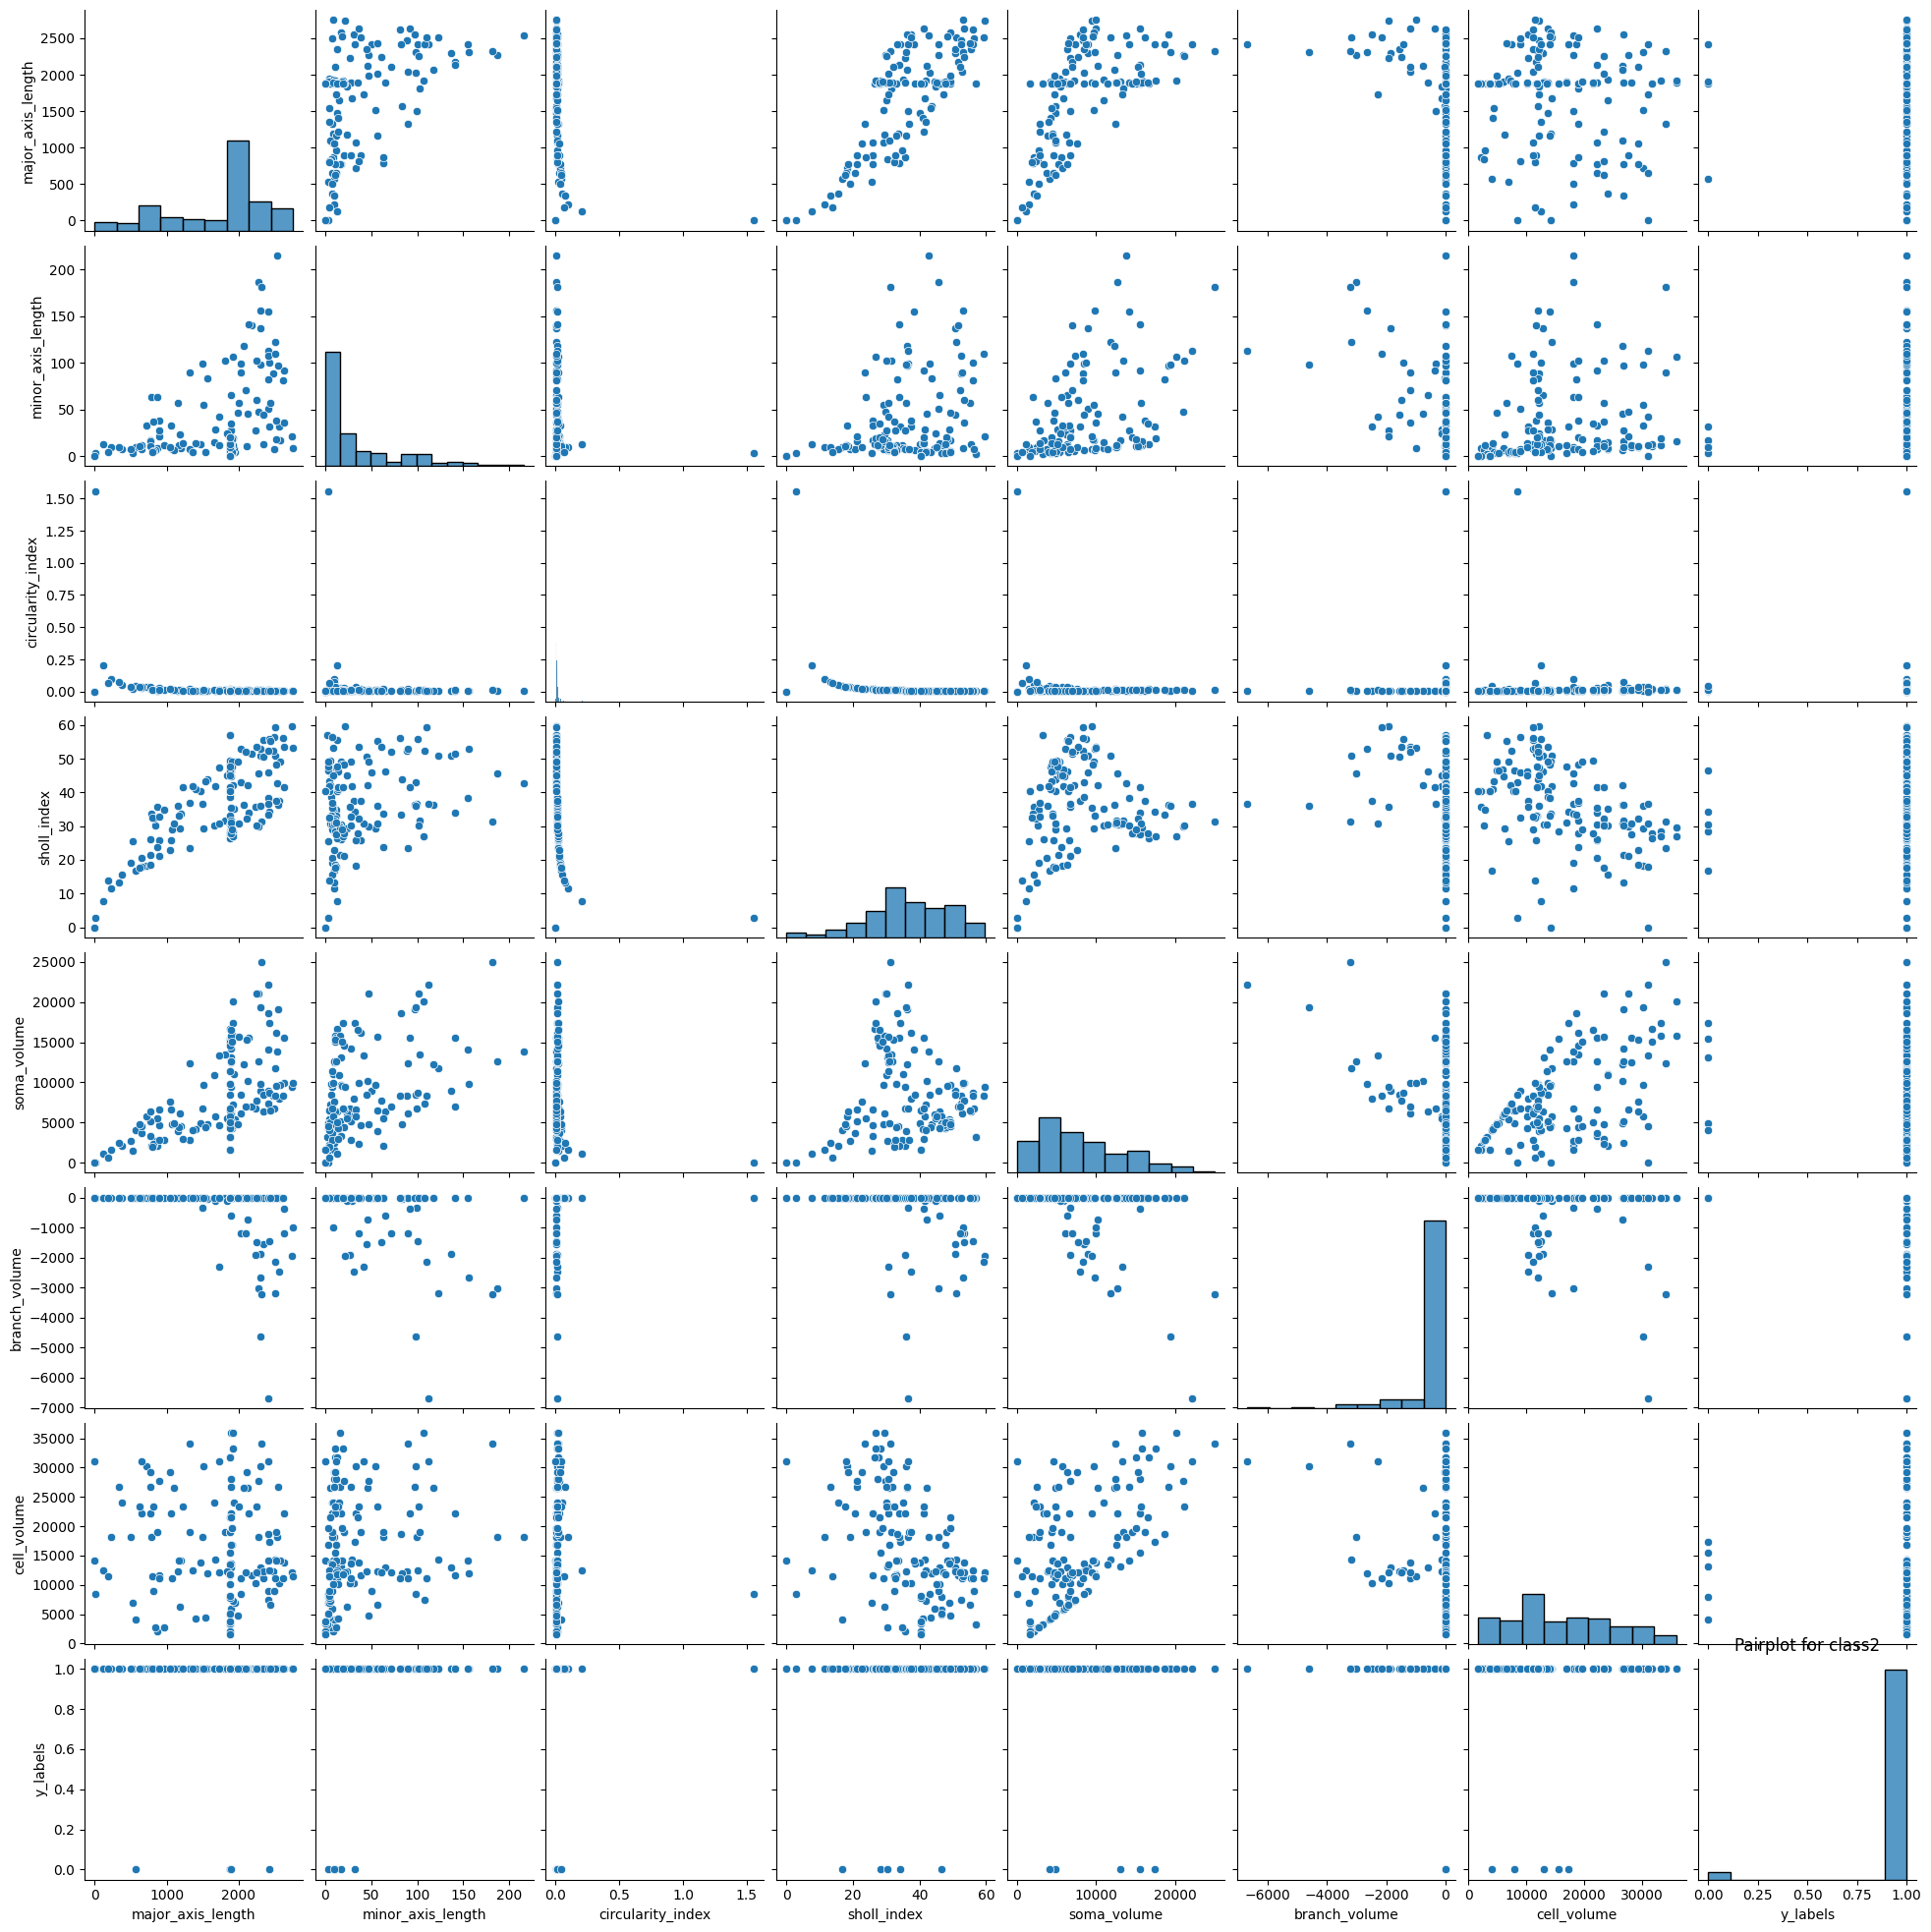

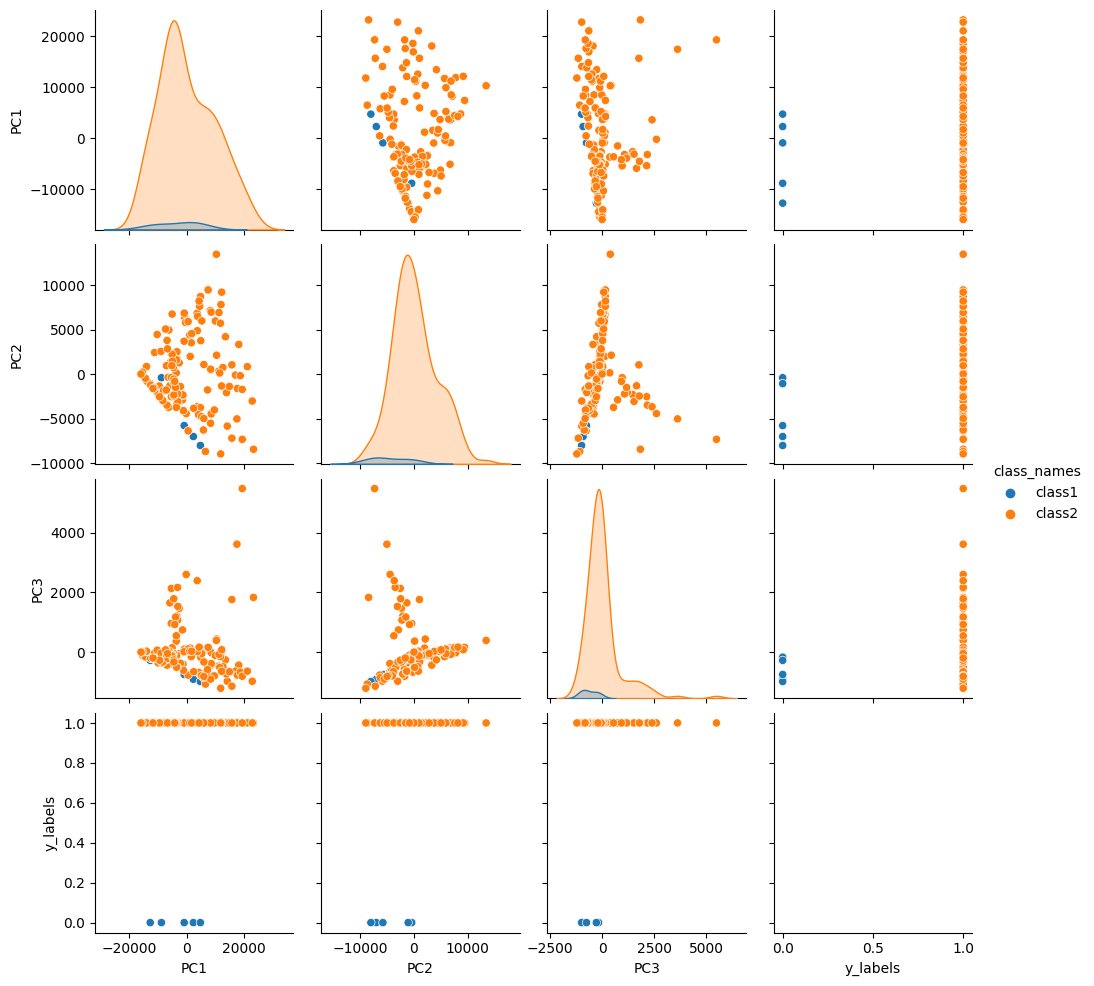

<ipython-input-7-a6585c214a74>:241: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pca_df.corr(), annot=True)


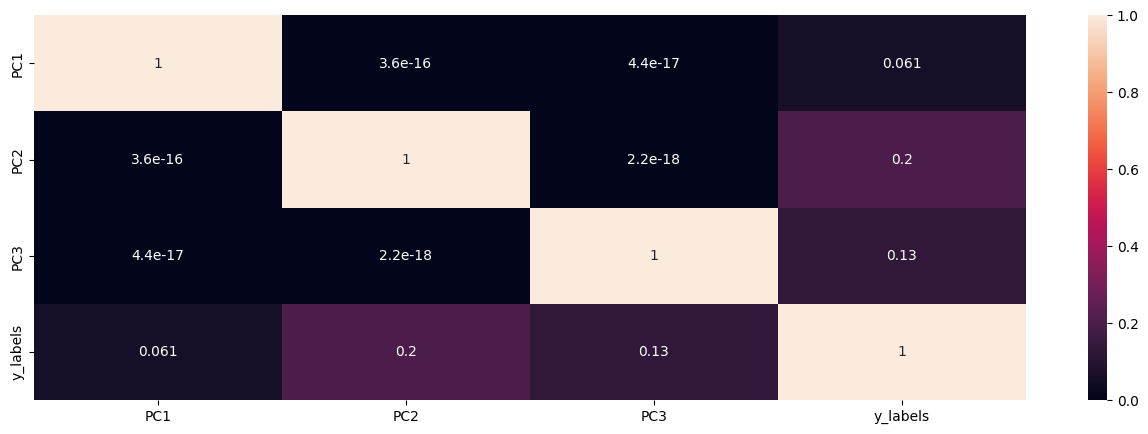

In [7]:
from skimage.measure import label, regionprops
from skimage.transform import rotate, warp, AffineTransform
from skimage.util import random_noise
import random
from sklearn.decomposition import PCA
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize

# Define the classes you want to include
classes = ['class1', 'class2']
num_augmentations_per_image = 4

y_labels = []
num_data_points_per_class = {}

class_index_mapping = {class_name: i for i, class_name in enumerate(classes)}
major_axis_lengths = []
minor_axis_lengths = []
circularity_indices = []
sholl_indices = []
soma_volumes = []  # 3D soma volume
branch_volumes = []  # 3D branch volume
cell_volumes = []  # 3D cell volume
# Remove 'surface_areas' list
all_masks = []
# Load multipage tiff image
def load_multipage_tiff(path):
    return cv2.imread(path, cv2.IMREAD_UNCHANGED)

def preprocess_image(image):
    resized_image = resize(image, (2087, 1628), anti_aliasing=True)
    normalized_image = resized_image / 255.0
    return normalized_image

def preprocess_mask(mask):
    binary_mask = resize(mask, (2087, 1628), anti_aliasing=False)
    return binary_mask

def apply_random_augmentation(image, mask):
    random.seed()

    # Random rotation
    angle = random.uniform(-10, 10)
    augmented_image = rotate(image, angle, mode='reflect', preserve_range=True)
    augmented_mask = rotate(mask, angle, mode='reflect', preserve_range=True)

    # Random affine transformation
    aftrans = AffineTransform(rotation=random.uniform(-10, 10), scale=(random.uniform(0.8, 1.2), random.uniform(0.8, 1.2)))
    augmented_image = warp(augmented_image, aftrans.inverse, mode='reflect', preserve_range=True)
    augmented_mask = warp(augmented_mask, aftrans.inverse, mode='reflect', preserve_range=True)

    # Random noise
    augmented_image = random_noise(augmented_image, mode='gaussian', var=0.01)

    # Ensure mask values are binary again
    augmented_mask[augmented_mask > 0] = 1

    return augmented_image, augmented_mask

# Function to calculate 3D volume
def calculate_3d_volume(binary_mask):
    labeled_mask, num_labels = label(binary_mask)
    volumes = []

    for label_idx in range(1, num_labels + 1):
        label_mask = labeled_mask == label_idx
        volume = np.sum(label_mask)
        volumes.append(volume)

    return volumes

# Loop through frames
for class_name in classes:
    class_index = class_index_mapping[class_name]
    images_path = sorted(os.listdir(f'/content/salam/images/{class_name}/'))
    masks_path = sorted(os.listdir(f'/content/salam/mask/{class_name}/'))
    num_data_points = 0

    for image_name, mask_name in zip(images_path, masks_path):
        image = load_multipage_tiff(f'/content/salam/images/{class_name}/{image_name}')
        mask = load_multipage_tiff(f'/content/salam/mask/{class_name}/{mask_name}')

        # Ensure image and mask have the same dimensions
        if image.shape != mask.shape:
            continue
        all_masks.append(mask)
        for frame_idx in range(image.shape[0]):
            frame_image = image[frame_idx]
            frame_mask = mask[frame_idx]

            if frame_mask is None:
                continue

            # Preprocess frame image and mask
            preprocessed_image = preprocess_image(frame_image)
            preprocessed_mask = preprocess_mask(frame_mask)

            labeled_mask = label(preprocessed_mask)
            if labeled_mask is None:
                continue

            props = regionprops(labeled_mask)
            for prop in props:
                major_axis_length = prop.major_axis_length
                minor_axis_length = np.max(prop.minor_axis_length)
                perimeter = prop.perimeter
                area = prop.area
                if perimeter != 0:
                    circularity_index = (4 * np.pi * area) / (perimeter ** 2)
                    sholl_index = perimeter / np.sqrt(area)
                else:
                    circularity_index = 0.0
                    sholl_index = 0.0

                major_axis_lengths.append(major_axis_length)
                minor_axis_lengths.append(minor_axis_length)
                circularity_indices.append(circularity_index)
                sholl_indices.append(sholl_index)

                y_labels.append(class_index)

                # Calculate 3D volume of soma and branches
                soma_volume, branch_volume = 0, 0
                if 'bbox' in prop:
                    bb = prop.bbox
                    soma_mask = preprocessed_mask[bb[0]:bb[2], bb[1]:bb[3]]
                    soma_volume = np.sum(soma_mask)
                    branch_volume = area - soma_volume

                soma_volumes.append(soma_volume)
                branch_volumes.append(branch_volume)

                # Calculate cell volume
                cell_volume = np.sum(preprocessed_mask)
                cell_volumes.append(cell_volume)

                # Remove surface area calculation

                # Apply data augmentation
                for _ in range(num_augmentations_per_image):
                    augmented_image, augmented_mask = apply_random_augmentation(preprocessed_image, preprocessed_mask)
                    augmented_labeled_mask = label(augmented_mask)
                    augmented_props = regionprops(augmented_labeled_mask)

                    for prop_aug in augmented_props:
                        major_axis_length_aug = prop_aug.major_axis_length
                        minor_axis_length_aug = np.max(prop_aug.minor_axis_length)
                        perimeter_aug = prop_aug.perimeter
                        area_aug = prop_aug.area
                        if perimeter_aug != 0:
                            circularity_index_aug = (4 * np.pi * area_aug) / (perimeter_aug ** 2)
                            sholl_index_aug = perimeter_aug / np.sqrt(area_aug)
                        else:
                            circularity_index_aug = 0.0
                            sholl_index_aug = 0.0

                        major_axis_lengths.append(major_axis_length_aug)
                        minor_axis_lengths.append(minor_axis_length_aug)
                        circularity_indices.append(circularity_index_aug)
                        sholl_indices.append(sholl_index_aug)

                        y_labels.append(class_index)

                        # Calculate 3D volume of soma and branches for augmented data
                        soma_volume_aug, branch_volume_aug = 0, 0
                        if 'bbox' in prop_aug:
                            bb_aug = prop_aug.bbox
                            soma_mask_aug = augmented_mask[bb_aug[0]:bb_aug[2], bb_aug[1]:bb_aug[3]]
                            soma_volume_aug = np.sum(soma_mask_aug)
                            branch_volume_aug = area_aug - soma_volume_aug

                        soma_volumes.append(soma_volume_aug)
                        branch_volumes.append(branch_volume_aug)

                        # Calculate cell volume for augmented data
                        cell_volume_aug = np.sum(augmented_mask)
                        cell_volumes.append(cell_volume_aug)

                        # Remove surface area calculation

            num_data_points += len(props) + (num_augmentations_per_image * len(props))

    num_data_points_per_class[class_name] = num_data_points

    print(f"Number of data points in {class_name}: {num_data_points}")

    class_data = {
        'major_axis_length': major_axis_lengths,
        'minor_axis_length': minor_axis_lengths,
        'circularity_index': circularity_indices,
        'sholl_index': sholl_indices,
        'soma_volume': soma_volumes,
        'branch_volume': branch_volumes,
        'cell_volume': cell_volumes,
        'y_labels': y_labels
    }
    class_df = pd.DataFrame(class_data)
    class_df['class_name'] = class_name
    sns.pairplot(class_df)
    plt.title(f"Pairplot for {class_name}")
    plt.show()

# Create the final DataFrame using the updated lists
raw_data = {
    'major_axis_length': major_axis_lengths,
    'minor_axis_length': minor_axis_lengths,
    'circularity_index': circularity_indices,
    'sholl_index': sholl_indices,
    'soma_volume': soma_volumes,
    'branch_volume': branch_volumes,
    'cell_volume': cell_volumes,
    # Remove 'surface_area' from raw_data

    'y_labels': y_labels
}

df = pd.DataFrame(raw_data)

y = df[['y_labels']]
X = df.drop(['y_labels'], axis=1)

n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df = pd.concat([pca_df, y], axis=1)

class_name_mapping = {v: k for k, v in class_index_mapping.items()}
pca_df['class_names'] = pca_df['y_labels'].map(class_name_mapping)

sns.pairplot(pca_df, hue='class_names')
plt.show()

plt.figure(figsize=(16, 5))
sns.heatmap(pca_df.corr(), annot=True)
plt.show()


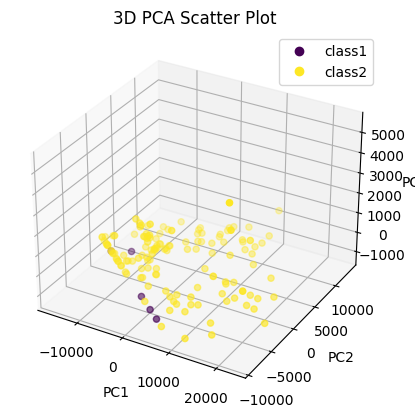

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming you have a DataFrame called pca_df with 3D PCA components
x = pca_df['PC1']
y = pca_df['PC2']
z = pca_df['PC3']
classes = pca_df['class_names']

# Create a scatter plot
scatter = ax.scatter(x, y, z, c=classes.map(class_index_mapping))

# Customize the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot')
plt.legend(handles=scatter.legend_elements()[0], labels=class_index_mapping.keys())
plt.show()


In [9]:
import tifffile as tiff

# Initialize a TIFF file for writing
tiff_file = tiff.TiffWriter('3d_features_cl0_3.tiff', bigtiff=True)

# Loop through different views or rotations
for angle in range(0, 360, 10):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(cell_volumes, branch_volumes, soma_volumes, c=y_labels, cmap='viridis')
    ax.set_xlabel('Cell Volume')
    ax.set_ylabel('Branch Volume')
    ax.set_zlabel('Soma Volume')
    ax.set_title('3D Scatter Plot of Volumes')

    # Rotate the view
    ax.view_init(elev=20, azim=angle)

    # Save the figure as a temporary image (e.g., PNG)
    temp_image_path = 'temp_image.png'
    fig.savefig(temp_image_path, dpi=300)  # You can adjust the DPI as needed

    # Read the image and append it as a page in the TIFF file
    image_data = plt.imread(temp_image_path)
    tiff_file.save(image_data)

    # Close the figure and remove the temporary image
    plt.close(fig)
    os.remove(temp_image_path)

# Close the TIFF file when done
tiff_file.close()


<ipython-input-9-4e8deb59ec92>:26: DeprecationWarning: <tifffile.TiffWriter.save> is deprecated. Use TiffWriter.write
  tiff_file.save(image_data)


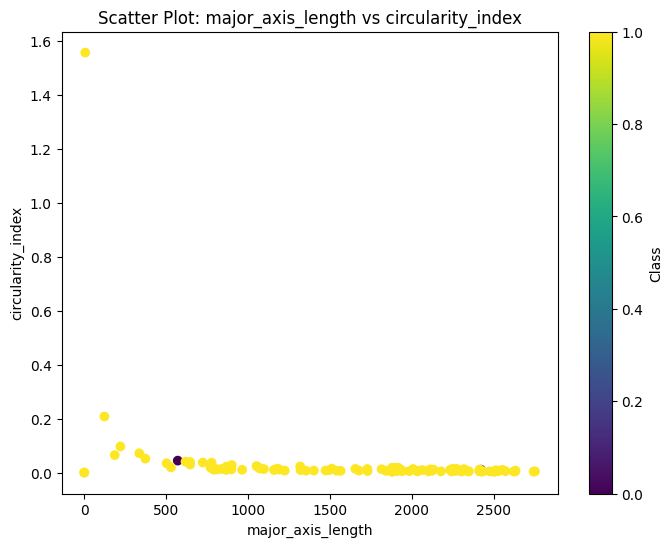

In [10]:
import matplotlib.pyplot as plt

# Select two features to visualize
feature1 = 'major_axis_length'
feature2 = 'circularity_index'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2], c=df['y_labels'], cmap='viridis')
plt.colorbar(label='Class')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot: {feature1} vs {feature2}')
plt.show()


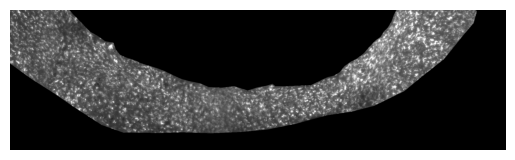

In [11]:
# Iterate through cells and annotate them with feature values
props_list = regionprops(labeled_mask)  # Move this line outside the loop to compute properties only once

for i in range(len(y_labels)):
    class_name = classes[y_labels[i]]

    if i < len(props_list):
        # Access the properties of the current cell (region)
        props = props_list[i]

        # Calculate the cell's position (e.g., using centroid or bounding box)
        centroid = props.centroid  # Calculate the centroid of the current cell
        x_coord, y_coord = centroid  # Use centroid as x and y coordinates

        feature_values = {
            'Major Axis Length': major_axis_lengths[i],
            'Minor Axis Length': minor_axis_lengths[i],
            'Circularity Index': circularity_indices[i],
            'Sholl Index': sholl_indices[i],
            'Soma Volume': soma_volumes[i],
            'Branch Volume': branch_volumes[i],
            'Cell Volume': cell_volumes[i]
        }

        # Create a rectangle or text annotation on the image
        rect = patches.Rectangle((x_coord, y_coord), width, height, linewidth=1, edgecolor='r', facecolor='none')
        text = "\n".join([f"{key}: {value:.2f}" for key, value in feature_values.items()])
        plt.annotate(text, (x_coord, y_coord), color='white', fontsize=6, ha='left', va='bottom')

# Display the annotated multi-stack TIFF image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


NameError: ignored

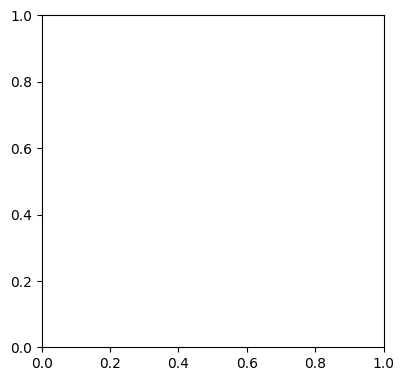

In [13]:
import random
import matplotlib.pyplot as plt

# Select the class you want to visualize
class_to_visualize = 'class2'  # Replace with the class you want to visualize

# Filter the data for the selected class
class_data = class_df[class_df['class_name'] == class_to_visualize]

# Determine the number of cells available in the selected class
num_cells_available = len(class_data)

# Select a random sample of cells to visualize (limiting it to the available cells)
num_cells_to_visualize = min(5, num_cells_available)  # Change 5 to your desired number
random_cells = random.sample(range(num_cells_available), num_cells_to_visualize)

# Create subplots to display images and features
plt.figure(figsize=(15, 5 * num_cells_to_visualize))

for i, cell_index in enumerate(random_cells):
    plt.subplot(num_cells_to_visualize, 3, i * 3 + 1)
    plt.imshow(your_image_data[cell_index], cmap='gray')  # Replace with your actual image data
    plt.title(f'Cell {cell_index} Image')
    plt.axis('off')

    plt.subplot(num_cells_to_visualize, 3, i * 3 + 2)
    plt.imshow(class_data.iloc[cell_index]['soma_mask'], cmap='gray')  # Replace with your soma mask data
    plt.title(f'Cell {cell_index} Soma Mask')
    plt.axis('off')

    plt.subplot(num_cells_to_visualize, 3, i * 3 + 3)
    plt.bar(['Major Axis', 'Minor Axis', 'Circularity', 'Sholl Index'],
            class_data.iloc[cell_index][['major_axis_length', 'minor_axis_length', 'circularity_index', 'sholl_index']])
    plt.title(f'Cell {cell_index} Features')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [14]:
# Iterate through the rows of the DataFrame
for index, row in class_df.iterrows():
    major_axis_length = row['major_axis_length']
    minor_axis_length = row['minor_axis_length']
    circularity_index = row['circularity_index']
    sholl_index = row['sholl_index']

    # Create a figure and axis for the cell image
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')

    # Display major axis length, minor axis length, circularity index, and Sholl index as text
    plt.text(10, 10, f"Major Axis Length: {major_axis_length:.2f}", color='red', fontsize=12)
    plt.text(10, 40, f"Minor Axis Length: {minor_axis_length:.2f}", color='red', fontsize=12)
    plt.text(10, 70, f"Circularity: {circularity_index:.2f}", color='red', fontsize=12)
    plt.text(10, 90, f"Sholl Index: {sholl_index:.2f}", color='red', fontsize=12)

    plt.title(f"Cell with Features (Class: {row['class_name']})")
    plt.axis('off')

    # Save or display the visualization
    # You can save it to a file or display it using plt.show()
    # plt.savefig(f'cell_with_features_{index}.png')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [15]:
import random

# Display at least five cells from each class
num_cells_to_display = 5

for class_name in classes:
    # Get a subset of the DataFrame for the current class
    class_subset = class_df[class_df['class_name'] == class_name]

    # Check if there are enough samples in the class subset
    if len(class_subset) >= num_cells_to_display:
        # Select at least five random cells from the class
        selected_cells = class_subset.sample(n=num_cells_to_display, random_state=42)

        # Display the selected cells and their feature values
        for index, row in selected_cells.iterrows():
            print(f"Class: {class_name}, Cell Index: {index}")
            print(f"Major Axis Length: {row['major_axis_length']}")
            print(f"Minor Axis Length: {row['minor_axis_length']}")
            print(f"Circularity Index: {row['circularity_index']}")
            print(f"Sholl Index: {row['sholl_index']}")
            print(f"Soma Volume: {row['soma_volume']}")
            print(f"Branch Volume: {row['branch_volume']}")
            print(f"Cell Volume: {row['cell_volume']}")
            print("-------------")
    else:
        print(f"Not enough samples in class {class_name} to display {num_cells_to_display}.")

# You can do the same for the PCA DataFrame
for class_name in classes:
    class_subset = pca_df[pca_df['class_names'] == class_name]
    if len(class_subset) >= num_cells_to_display:
        selected_cells = class_subset.sample(n=num_cells_to_display, random_state=42)
        for index, row in selected_cells.iterrows():
            print(f"Class: {class_name}, Cell Index: {index}")
            print(f"PC1: {row['PC1']}")
            print(f"PC2: {row['PC2']}")
            print(f"PC3: {row['PC3']}")
            print("-------------")
    else:
        print(f"Not enough samples in class {class_name} to display {num_cells_to_display}.")


Streaming output truncated to the last 5000 lines.
Soma Volume: 15079.0
Branch Volume: 0.0
Cell Volume: 19635.0
-------------
Class: class2, Cell Index: 51
Major Axis Length: 1879.8521218436306
Minor Axis Length: 4.47213595499958
Circularity Index: 0.0076999704016623635
Sholl Index: 40.39805016337369
Soma Volume: 6512.0
Branch Volume: 0.0
Cell Volume: 7820.78431372549
-------------
Class: class2, Cell Index: 139
Major Axis Length: 1880.8257612813825
Minor Axis Length: 12.91076570266927
Circularity Index: 0.005527903105641239
Sholl Index: 47.67873463842849
Soma Volume: 5094.0
Branch Volume: 0.0
Cell Volume: 11861.0
-------------
Class: class2, Cell Index: 19
Major Axis Length: 2306.4433033238797
Minor Axis Length: 155.9465284453306
Circularity Index: 0.004476684236367119
Sholl Index: 52.98179901083852
Soma Volume: 9763.0
Branch Volume: -2650.0
Cell Volume: 11929.0
-------------
Class: class2, Cell Index: 104
Major Axis Length: 1843.745276641653
Minor Axis Length: 24.05717526916574
Circu

ValueError: ignored

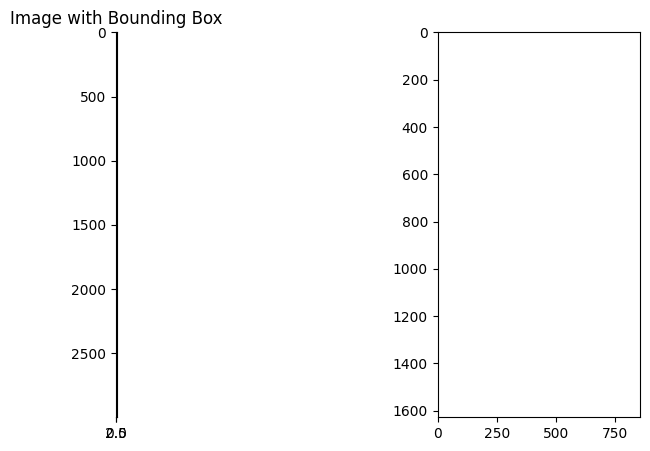

In [17]:
import numpy as np
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_cell_features(cell_index):
    # Get the image and mask for the selected cell
    image = image_data[cell_index]
    mask = all_masks[cell_index]

    # Calculate the features of the cell
    major_axis_length_value = major_axis_lengths[cell_index]
    minor_axis_length_value = minor_axis_lengths[cell_index]
    circularity_indice_value = circularity_indices[cell_index]
    sholl_indice_value = sholl_indices[cell_index]

    # Create a labeled image from the mask
    labeled_image = label(mask)

    # Check if there are any labeled regions in the image
    if labeled_image.max() == 0:
        raise ValueError("No labeled regions found in the mask.")

    # Get the properties of the labeled regions
    props = regionprops(labeled_image)

    # Verify if the cell_index is valid
    if cell_index >= len(props):
        raise ValueError("Invalid cell_index value.")

    # Get the properties of the selected cell
    cell_props = props[cell_index]
    bbox = cell_props.bbox

    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                            linewidth=2, edgecolor='yellow', facecolor='none')

    # Display the image and mask with the cell marked by the bounding box
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].add_patch(rect)  # Add the bounding box to axs[0]
    axs[0].set_title('Image with Bounding Box')

    # Apply the mask to the image to mark the cell
    masked_image = np.ma.masked_where(mask == 0, mask)

    axs[1].imshow(masked_image, cmap='Reds', alpha=0.5)
    axs[1].add_patch(rect)  # Add the bounding box to axs[1]
    axs[1].set_title('Mask with Bounding Box')

    plt.suptitle('Features of Cell {}'.format(cell_index))
    plt.show()

    # Display the calculated features
    print('major_axis_length:', major_axis_length_value)
    print('minor_axis_length:', minor_axis_length_value)
    print('circularity_index:', circularity_indice_value)
    print('sholl_index:', sholl_indice_value)

# Usage:
cell_index_to_display = 0  # Change this to the desired cell index
display_cell_features(cell_index_to_display)



In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df.loc[:, 'PC1':'PC3'], np.ravel(pca_df[['y_labels']]),
                                                   test_size=0.4, random_state=42, stratify=np.ravel(pca_df[['y_labels']]))

# Convert X_train and y_train to NumPy arrays if they are not already
X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape y_train to be a 1D array if needed
y_train = y_train.ravel()

# Create an instance of SVC
svc = SVC(probability=True, class_weight='balanced')


# Define the parameter grid for GridSearchCV
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],  # Add more values
    'gamma': [0.01, 0.1, 1, 10],  # Add more values
}

# Create GridSearchCV object
clf = GridSearchCV(svc, parameters, cv=4)

'''
# Define the parameter grid for GridSearchCV
#parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
parameters = {'kernel': ['linear', 'rbf'], 'C': [1, 10]}
# Create GridSearchCV object
clf = GridSearchCV(svc, parameters, cv=4)
#clf = RandomizedSearchCV(svc, parameters, n_iter=10, cv=4)
# Fit the classifier to the training data
'''
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert X_test and y_test to NumPy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate classification error
classification_error = 1 - accuracy
print("Classification Error:", classification_error)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=range(len(classes)))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity, specificity, false positive rate, and precision for each class
num_classes = len(np.unique(y_test))
for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    true_negatives = np.sum(conf_matrix) - true_positives - false_positives - false_negatives

    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    false_positive_rate = false_positives / (false_positives + true_negatives)
    precision = true_positives / (true_positives + false_positives)

    print("Class", i+1)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("False Positive Rate:", false_positive_rate)
    print("Precision:", precision)
    print()


Accuracy: 0.9166666666666666
Classification Error: 0.08333333333333337
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.98      0.93      0.96        58

    accuracy                           0.92        60
   macro avg       0.59      0.72      0.62        60
weighted avg       0.96      0.92      0.93        60

Confusion Matrix:
[[ 1  1  0 ...  0  0  0]
 [ 4 54  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Class 1
Sensitivity: 0.5
Specificity: 0.9310344827586207
False Positive Rate: 0.06896551724137931
Precision: 0.2

Class 2
Sensitivity: 0.9310344827586207
Specificity: 0.5
False Positive Rate: 0.5
Precision: 0.9818181818181818

